In [1]:
pwd


'/Users/Igor/Desktop/MICourse'

In [1]:
cd data/

/Users/Igor/Desktop/MICourse/data


In [2]:
import os 
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
train_df = pd.read_csv('train-balanced-sarcasm.csv')

In [4]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 10 columns):
label             1010773 non-null int64
comment           1010773 non-null object
author            1010773 non-null object
subreddit         1010773 non-null object
score             1010773 non-null int64
ups               1010773 non-null int64
downs             1010773 non-null int64
date              1010773 non-null object
created_utc       1010773 non-null object
parent_comment    1010773 non-null object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


In [6]:
train_df.dropna(subset = ['comment'], inplace= True)

In [7]:
train_df['label'].value_counts(normalize= True)

0    0.500018
1    0.499982
Name: label, dtype: float64

In [8]:
train_texts, valid_texts, y_train, y_valid = train_test_split(train_df['comment'], \
                                                              train_df['label'], random_state = 17)

In [12]:
train_texts.head()

827869                      Should have named it Samsquanch
800568                       All that knob wants is uranus.
506459                  No their dogs gave up halfway here.
372707    I'm sure icefrog is that bad at critical self-...
548483      Thanks for your contribution to the discussion.
Name: comment, dtype: object

In [10]:
valid_texts.head()

469600    Starting to feel pretty fucking tired of all t...
639137    It's like that label actually has no meaning b...
240293    Mained Fiora - Reworked Mained AP Tristana - W...
702254    Yeah lol that's right they wouldn't let black ...
889040              No, he made the thread asking jokingly.
Name: comment, dtype: object

In [14]:
y_train

827869    0
800568    1
506459    0
372707    1
548483    1
39449     0
245941    1
819473    0
10569     0
896170    1
397512    1
153812    0
829210    0
439855    0
953516    0
219112    0
894106    1
448930    1
338307    1
864466    1
616961    0
836326    0
760526    1
138838    1
515103    1
164528    0
739160    0
616454    0
750211    1
585565    0
         ..
321573    1
86715     1
722754    0
778229    0
400563    0
573423    0
122120    0
450381    1
988849    1
578038    0
543517    0
54968     1
633917    1
261142    0
1774      0
510864    1
701984    1
79790     1
299482    1
904777    0
358735    1
287781    0
516389    0
776135    1
125682    1
828759    1
491940    0
297109    0
589061    0
993950    1
Name: label, Length: 758079, dtype: int64

In [11]:
train_test_split(train_df['comment'], \
                       train_df['label'], random_state = 17)

[827869                      Should have named it Samsquanch
 800568                       All that knob wants is uranus.
 506459                  No their dogs gave up halfway here.
 372707    I'm sure icefrog is that bad at critical self-...
 548483      Thanks for your contribution to the discussion.
 39449                              Eskilstuna represeeeeent
 245941    I thought only women got harassed on the internet
 819473    So this is what happens at the confluence of o...
 10569                               The Kyrie IIs are dece.
 896170    And if you use unofficial cards you'll lose mo...
 397512               Didn't know cards fans were pedophiles
 153812    I watched TNG with my mom when they first aire...
 829210                       I'm getting sick of this shit.
 439855    I do enjoy him but I don't see a anything vali...
 953516    You'd look pregnant too if you ate 5 pounds of...
 219112                                      Kitty crunches!
 894106                 

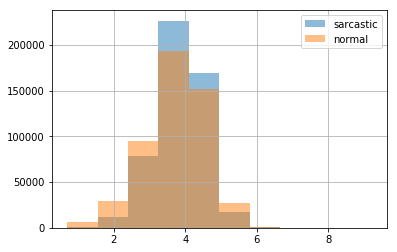

In [39]:
train_df.loc[train_df['label']==1, 'comment'].str.len().apply(np.log1p).hist(label='sarcastic', alpha= .5)
train_df.loc[train_df['label']==0, 'comment'].str.len().apply(np.log1p).hist(label='normal', alpha = .5)
plt.legend()

In [41]:
from wordcloud import WordCloud, STOPWORDS

In [42]:
wordcloud = WordCloud(background_color= 'black', stopwords= STOPWORDS, 
                     max_words = 200, max_font_size = 100, 
                     random_state = 17, width = 800, height = 400)

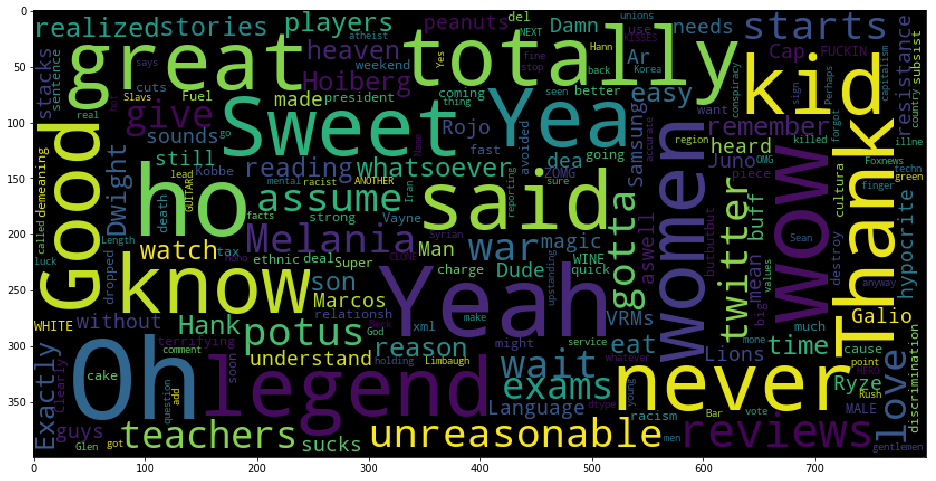

In [44]:
plt.figure(figsize=(16,12))
wordcloud.generate(str(train_df.loc[train_df['label']==1, 'comment']))
plt.imshow(wordcloud)
                                    

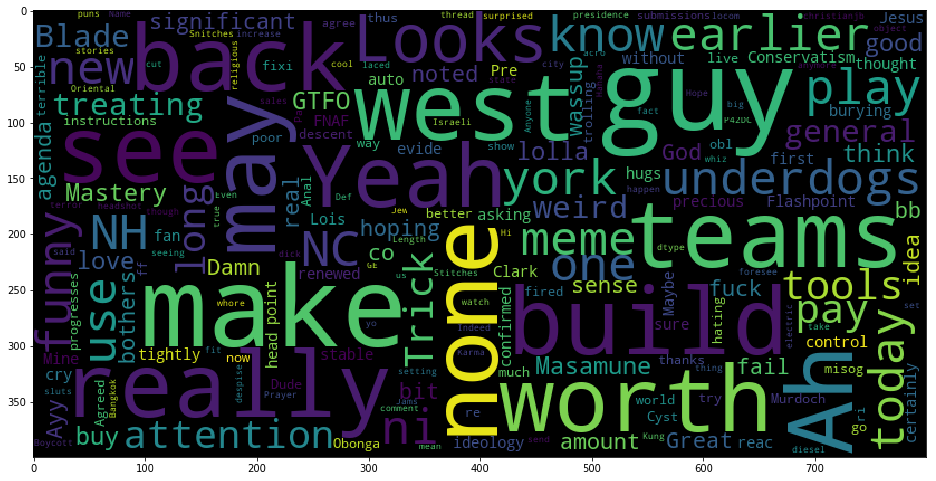

In [45]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(train_df.loc[train_df['label'] == 0, 'comment']))
plt.imshow(wordcloud);

In [48]:
sub_df = train_df.groupby('subreddit')['label'].agg([np.size, np.mean, np.sum])
sub_df.sort_values(by = 'sum', ascending= False ).head(10)

,size,mean,sum
subreddit,,,
AskReddit,65674,0.401453,26365
politics,39493,0.605348,23907
worldnews,26376,0.642516,16947
leagueoflegends,21034,0.542312,11407
pcmasterrace,18987,0.566651,10759
news,16891,0.603457,10193
funny,17939,0.451474,8099
pics,16152,0.484336,7823
todayilearned,14159,0.547567,7753


In [49]:
sub_df[sub_df['size']>1000].sort_values(by = 'mean', ascending = False).head(10)

,size,mean,sum
subreddit,,,
creepyPMs,5466,0.784303,4287
MensRights,3355,0.680775,2284
ShitRedditSays,1284,0.661994,850
worldnews,26376,0.642516,16947
Libertarian,2562,0.640125,1640
atheism,7377,0.639555,4718
Conservative,1881,0.639553,1203
TwoXChromosomes,1560,0.632692,987
fatlogic,2356,0.623090,1468


In [50]:
sub_df = train_df.groupby('author')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size']>300].sort_values(by ='mean', ascending = False).head(10)

,size,mean,sum
author,,,
NeonDisease,422,0.500000,211
ShyBiDude89,404,0.500000,202
ivsciguy,342,0.500000,171
mad-n-fla,318,0.500000,159
mindlessrabble,302,0.500000,151
pokemon_fetish,432,0.500000,216
Biffingston,845,0.499408,422


In [51]:
sub_df = train_df[train_df['score'] < 0].groupby('score')['label'].agg([np.size, np.mean, np.sum])
sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

,size,mean,sum
score,,,
-14,537,0.698324,375
-8,1852,0.696004,1289
-9,1503,0.691284,1039
-6,3088,0.688795,2127
-12,776,0.684278,531
-5,4134,0.678520,2805
-3,6736,0.676069,4554
-2,11924,0.675948,8060
-4,5436,0.673473,3661


### Training the model


In [83]:
tf_idf = TfidfVectorizer(ngram_range = (1,2),max_features=50000, min_df=2)
logit = LogisticRegression(C =1 , n_jobs =4, solver = 'lbfgs', random_state=17, verbose=1)

#sklearn's pipline

tfidf_logit_pipline = Pipeline([('tf_idf', tf_idf),
                               ('logit', logit)])

In [85]:
%time
tfidf_logit_pipline.fit(train_texts, y_train)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 34.8 µs


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   22.0s finished


Pipeline(memory=None,
     steps=[('tf_idf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=50000, min_df=2,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,... penalty='l2', random_state=17, solver='lbfgs', tol=0.0001,
          verbose=1, warm_start=False))])

In [86]:
%time
valid_pred = tfidf_logit_pipline.predict(valid_texts)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11 µs


In [87]:
accuracy_score(y_valid, valid_pred)

0.7209154154827578

### Part 3.Explaing the model


In [88]:

def plot_confusion_matrix(actual, predicted, classes,
                          normalize=False,
                          title='Confusion matrix', figsize=(7,7),
                          cmap=plt.cm.Blues, path_to_save_fig=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(actual, predicted).T
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    
    if path_to_save_fig:
        plt.savefig(path_to_save_fig, dpi=300, bbox_inches='tight')

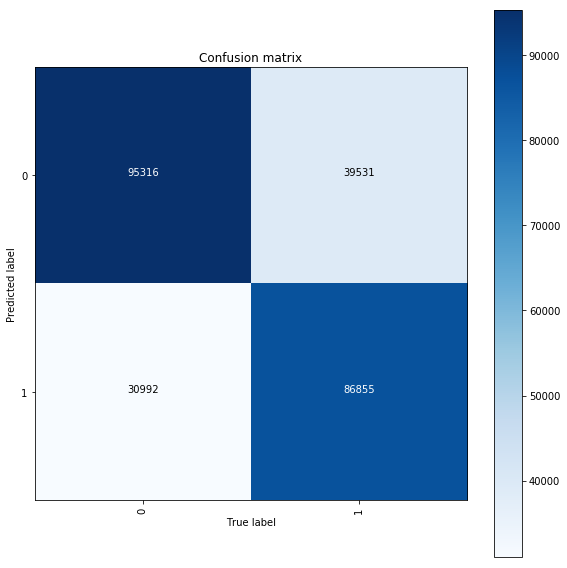

In [89]:
plot_confusion_matrix(y_valid, valid_pred, tfidf_logit_pipline.named_steps['logit'].classes_,figsize=(8,8))

In [73]:
 tfidf_logit_pipline.named_steps['logit'].classes_

array([0, 1])

In [77]:
import eli5

In [95]:

eli5.show_weights(estimator=tfidf_logit_pipline.named_steps['logit'],
                  vec=tfidf_logit_pipline.named_steps['tf_idf'])

Weight?,Feature
+9.398,yes because
+7.649,clearly
+7.299,yeah because
+7.277,obviously
+6.719,totally
+6.487,because
+5.991,how dare
+5.880,right because
+5.407,but thought
+5.249,duh


## Part 4. Impoving the model


In [98]:
subreddits = train_df['subreddit']
train_subreddits, valid_subreddits = train_test_split(subreddits, random_state = 17)

In [99]:
tf_idf_texts = TfidfVectorizer(ngram_range=(1,2), max_features=50000, min_df=2)
tf_idf_subreddits = TfidfVectorizer(ngram_range=(1,1))

In [121]:
%time 
X_train_texts = tf_idf_texts.fit_transform(train_texts)
X_valid_texts = tf_idf_texts.transform(valid_texts)

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 48.9 µs


In [123]:
X_train_texts.shape, X_valid_texts.shape

((758079, 50000), (252694, 50000))

In [124]:
%%time
X_train_subreddits = tf_idf_subreddits.fit_transform(train_subreddits)
X_valid_subreddits = tf_idf_subreddits.transform(valid_subreddits)

CPU times: user 6.29 s, sys: 148 ms, total: 6.44 s
Wall time: 6.48 s


In [125]:
X_train_subreddits.shape, X_valid_subreddits.shape

((758079, 13255), (252694, 13255))

In [126]:
from scipy.sparse import hstack
X_train = hstack([X_train_texts, X_train_subreddits])
X_valid = hstack([X_valid_texts, X_valid_subreddits])

In [127]:
X_train.shape, X_valid.shape

((758079, 63255), (252694, 63255))

In [128]:
logit.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   24.2s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=17, solver='lbfgs', tol=0.0001,
          verbose=1, warm_start=False)

In [129]:
%time 
valid_pred= logit.predict(X_valid)

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 48.9 µs


In [130]:
accuracy_score(y_valid, valid_pred)

0.7237805408913548